Importing Necessary Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Format & Style

In [15]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

Load Data

In [18]:
df = pd.read_csv("OECD_Pharma.csv")

Data Cleaning & Data Overview

In [19]:
print("Columns:", df.columns.tolist())
print(df.head())

Columns: ['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA', 'Reference area', 'MEASURE', 'Measure', 'UNIT_MEASURE', 'Unit of measure', 'MARKET_TYPE', 'Market type', 'PHARMACEUTICAL', 'Pharmaceutical', 'TIME_PERIOD', 'Time period', 'OBS_VALUE', 'Observation value', 'OBS_STATUS', 'Observation status', 'OBS_STATUS2', 'Observation status 2', 'OBS_STATUS3', 'Observation status 3', 'UNIT_MULT', 'Unit multiplier', 'DECIMALS', 'Decimals']
  STRUCTURE                                STRUCTURE_ID        STRUCTURE_NAME  \
0  DATAFLOW  OECD.ELS.HD:HEALTH_PHMC@DF_PHMC_SALES(1.1)  Pharmaceutical sales   
1  DATAFLOW  OECD.ELS.HD:HEALTH_PHMC@DF_PHMC_SALES(1.1)  Pharmaceutical sales   
2  DATAFLOW  OECD.ELS.HD:HEALTH_PHMC@DF_PHMC_SALES(1.1)  Pharmaceutical sales   
3  DATAFLOW  OECD.ELS.HD:HEALTH_PHMC@DF_PHMC_SALES(1.1)  Pharmaceutical sales   
4  DATAFLOW  OECD.ELS.HD:HEALTH_PHMC@DF_PHMC_SALES(1.1)  Pharmaceutical sales   

  ACTION REF_AREA Reference area   MEASURE               Me

In [20]:
df = df.rename(columns={
    "LOCATION": "Country",
    "TIME": "Year",
    "Value": "USD_PPP_per_Capita"
})

In [22]:
df = df[["Reference area", "TIME_PERIOD", "OBS_VALUE"]]
df = df.rename(columns={
    "Reference area": "Country",
    "TIME_PERIOD": "Year",
    "OBS_VALUE": "USD_PPP_per_Capita"
})
df.dropna(inplace=True)
df["Year"] = df["Year"].astype(int)

Global Trend in Per Capita Spending

/tmp/ipython-input-23-2514186415.py:8: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


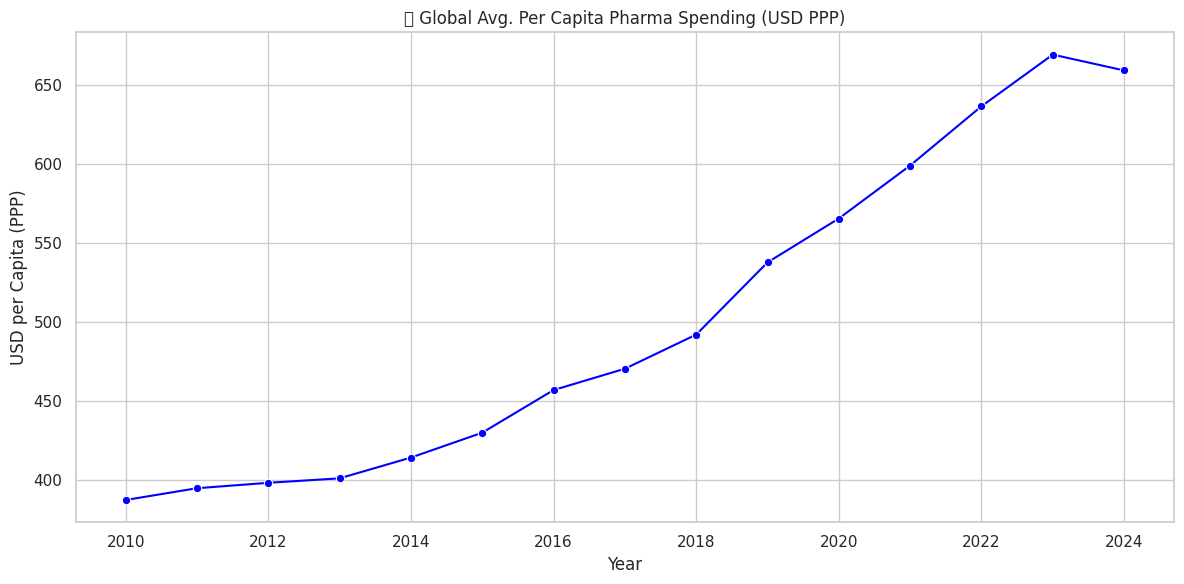

In [23]:
global_trend = df.groupby("Year")["USD_PPP_per_Capita"].mean().reset_index()

plt.figure()
sns.lineplot(data=global_trend, x="Year", y="USD_PPP_per_Capita", marker="o", color="blue")
plt.title("💸 Global Avg. Per Capita Pharma Spending (USD PPP)")
plt.xlabel("Year")
plt.ylabel("USD per Capita (PPP)")
plt.tight_layout()
plt.show()

Top 5 Countries in Latest Year

/tmp/ipython-input-24-2059450434.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x="Country", y="USD_PPP_per_Capita", palette="viridis")
/tmp/ipython-input-24-2059450434.py:9: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


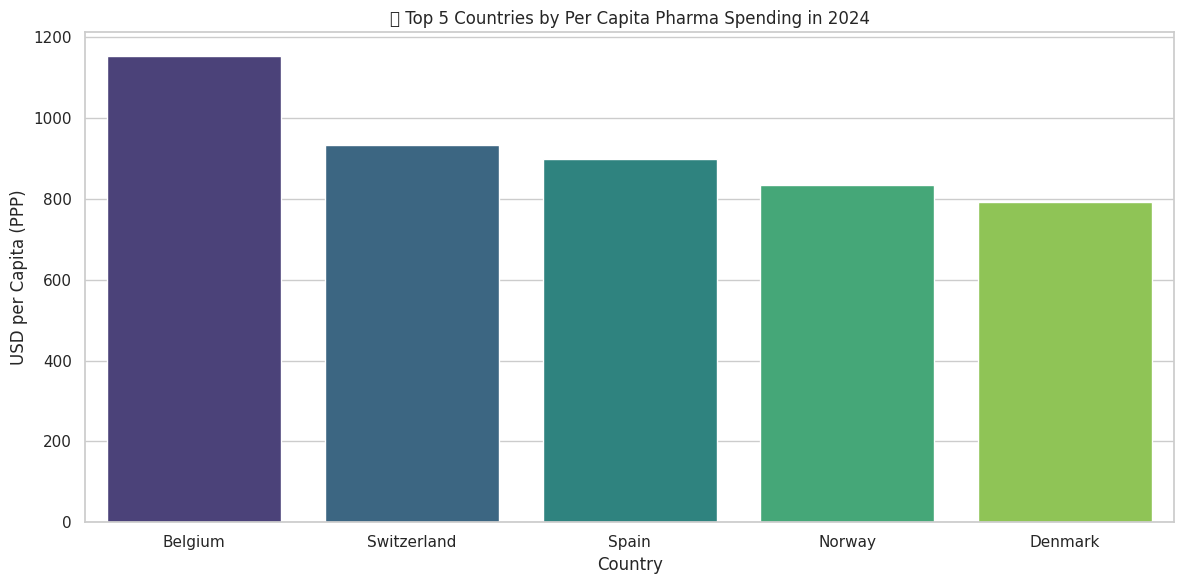

In [24]:
latest_year = df["Year"].max()
top_countries = df[df["Year"] == latest_year].sort_values(by="USD_PPP_per_Capita", ascending=False).head(5)

plt.figure()
sns.barplot(data=top_countries, x="Country", y="USD_PPP_per_Capita", palette="viridis")
plt.title(f"🏆 Top 5 Countries by Per Capita Pharma Spending in {latest_year}")
plt.xlabel("Country")
plt.ylabel("USD per Capita (PPP)")
plt.tight_layout()
plt.show()

CAGR Calculation (Global Avg.)

In [25]:
start_year = df["Year"].min()
end_year = df["Year"].max()
start_val = global_trend[global_trend["Year"] == start_year]["USD_PPP_per_Capita"].values[0]
end_val = global_trend[global_trend["Year"] == end_year]["USD_PPP_per_Capita"].values[0]
years = end_year - start_year

cagr = ((end_val / start_val) ** (1 / years)) - 1
print(f"📊 CAGR (Compound Annual Growth Rate) from {start_year} to {end_year}: {cagr * 100:.2f}%")

📊 CAGR (Compound Annual Growth Rate) from 2010 to 2024: 3.88%


4. CAGR Calculation (Global Total Spend)

In [27]:
start_year = df["Year"].min()
end_year = df["Year"].max()

start_value = global_trend[global_trend["Year"] == start_year]["USD_PPP_per_Capita"].values[0]
end_value = global_trend[global_trend["Year"] == end_year]["USD_PPP_per_Capita"].values[0]

n_years = end_year - start_year
cagr = ((end_value / start_value) ** (1 / n_years)) - 1

print(f"📊 CAGR of Total Global Pharmaceutical Spending ({start_year}–{end_year}): {cagr*100:.2f}%")

📊 CAGR of Total Global Pharmaceutical Spending (2010–2024): 3.88%


Spending Inequality: Top vs Bottom Quartile

In [28]:
latest = df[df["Year"] == latest_year]
top_25 = latest["USD_PPP_per_Capita"].quantile(0.75)
bottom_25 = latest["USD_PPP_per_Capita"].quantile(0.25)
inequality_gap = top_25 - bottom_25

print(f"📉 Spending Gap in {latest_year}: ${inequality_gap:.2f} per capita")

📉 Spending Gap in 2024: $285.40 per capita


#Financial Analysis & Modeling

 Forecast Future Spending (Linear/Exponential Model)

/tmp/ipython-input-29-839864135.py:22: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


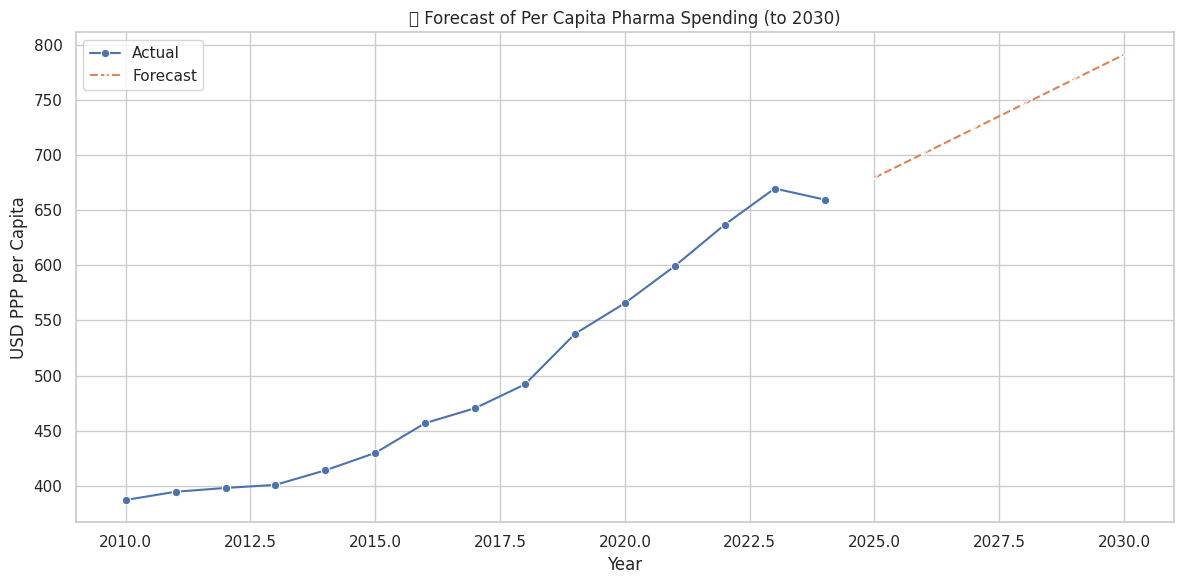

In [29]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Global avg trend
X = global_trend[["Year"]]
y = global_trend["USD_PPP_per_Capita"]

model = LinearRegression()
model.fit(X, y)

# Forecast to 2030
future_years = pd.DataFrame({"Year": np.arange(df["Year"].max() + 1, 2031)})
future_preds = model.predict(future_years)

# Plot forecast
plt.figure()
sns.lineplot(x=X["Year"], y=y, label="Actual", marker="o")
sns.lineplot(x=future_years["Year"], y=future_preds, label="Forecast", linestyle="--", marker="x")
plt.title("📈 Forecast of Per Capita Pharma Spending (to 2030)")
plt.xlabel("Year")
plt.ylabel("USD PPP per Capita")
plt.tight_layout()
plt.show()

Financial Model: ROI on Increasing Drug Subsidy

In [30]:
# Let's simulate: A 15% reduction in cost for consumers across the top 10 countries
subsidy_rate = 0.15

top_10_latest = df[df["Year"] == df["Year"].max()].nlargest(10, "USD_PPP_per_Capita").copy()
top_10_latest["Consumer_Spend"] = top_10_latest["USD_PPP_per_Capita"]
top_10_latest["Govt_Subsidy"] = top_10_latest["Consumer_Spend"] * subsidy_rate
top_10_latest["New_Cost_to_Consumer"] = top_10_latest["Consumer_Spend"] - top_10_latest["Govt_Subsidy"]

# Let's say subsidy leads to 5% reduction in healthcare admissions costing $500 per capita
top_10_latest["Healthcare_Savings"] = 0.05 * 500

# ROI = (Savings - Cost) / Cost
top_10_latest["ROI"] = (top_10_latest["Healthcare_Savings"] - top_10_latest["Govt_Subsidy"]) / top_10_latest["Govt_Subsidy"]

print(top_10_latest[["Country", "Govt_Subsidy", "Healthcare_Savings", "ROI"]])

            Country  Govt_Subsidy  Healthcare_Savings       ROI
446         Belgium       173.145                25.0 -0.855612
267     Switzerland       139.815                25.0 -0.821192
449           Spain       134.820                25.0 -0.814568
207          Norway       124.965                25.0 -0.799944
235         Denmark       118.950                25.0 -0.789828
35   United Kingdom       117.045                25.0 -0.786407
447           Italy       112.875                25.0 -0.778516
192          Sweden       111.870                25.0 -0.776526
385          Latvia        99.330                25.0 -0.748314
451      Luxembourg        97.785                25.0 -0.744337


Dynamic Per Capita Forecast Using CAGR from OECD Benchmarks

In [31]:
# Calculate CAGR from actual OECD dataset: Mexico (2010–2016)
mex_2010 = 180
mex_2016 = 235
years = 6

cagr_mexico = ((mex_2016 / mex_2010) ** (1 / years)) - 1

# Apply same CAGR to India's current spend
india_2024 = 90
projected = {}

for year in range(2024, 2031):
    if year == 2024:
        projected[year] = india_2024
    else:
        projected[year] = projected[year - 1] * (1 + cagr_mexico)

# Create a DataFrame
import pandas as pd
df_proj = pd.DataFrame(list(projected.items()), columns=["Year", "India_Per_Capita_Spend"])
df_proj["Population"] = [1.4e9 + (i * 0.013e9) for i in range(7)]  # Simple pop growth
df_proj["Market_Size"] = df_proj["India_Per_Capita_Spend"] * df_proj["Population"]

# Simulate Karkinos capture
df_proj["Revenue_0.5%"] = df_proj["Market_Size"] * 0.005
df_proj["Revenue_1%"] = df_proj["Market_Size"] * 0.01

df_proj

,Year,India_Per_Capita_Spend,Population,Market_Size,Revenue_0.5%,Revenue_1%
0,2024,90.000000,1.400000e+09,1.260000e+11,6.300000e+08,1.260000e+09
1,2025,94.089625,1.413000e+09,1.329486e+11,6.647432e+08,1.329486e+09
2,2026,98.365083,1.426000e+09,1.402686e+11,7.013430e+08,1.402686e+09
3,2027,102.834819,1.439000e+09,1.479793e+11,7.398965e+08,1.479793e+09
4,2028,107.507661,1.452000e+09,1.561011e+11,7.805056e+08,1.561011e+09
5,2029,112.392839,1.465000e+09,1.646555e+11,8.232775e+08,1.646555e+09
6,2030,117.500000,1.478000e+09,1.736650e+11,8.683250e+08,1.736650e+09


Add CapEx, OpEx, Net Profit & Payback

In [32]:
# Assume annual cost of running Karkinos Pharma division
capex = 20_000_000  # Initial investment
opex_per_year = 15_000_000  # Operating costs

df_proj["OpEx"] = opex_per_year
df_proj["Net_Profit"] = df_proj["Revenue_0.5%"] - df_proj["OpEx"]

# Add cumulative cash flow
df_proj["Cumulative_Cashflow"] = df_proj["Net_Profit"].cumsum() - capex

# Calculate Payback Year
payback_year = df_proj[df_proj["Cumulative_Cashflow"] > 0]["Year"].min()
print(f"📆 Payback Period: {payback_year} (Breakeven by Year {payback_year - 2024})")

📆 Payback Period: 2024 (Breakeven by Year 0)


Dashboards

/tmp/ipython-input-33-1275687955.py:14: UserWarning: Glyph 128185 (\N{CHART WITH UPWARDS TREND AND YEN SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128185 (\N{CHART WITH UPWARDS TREND AND YEN SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


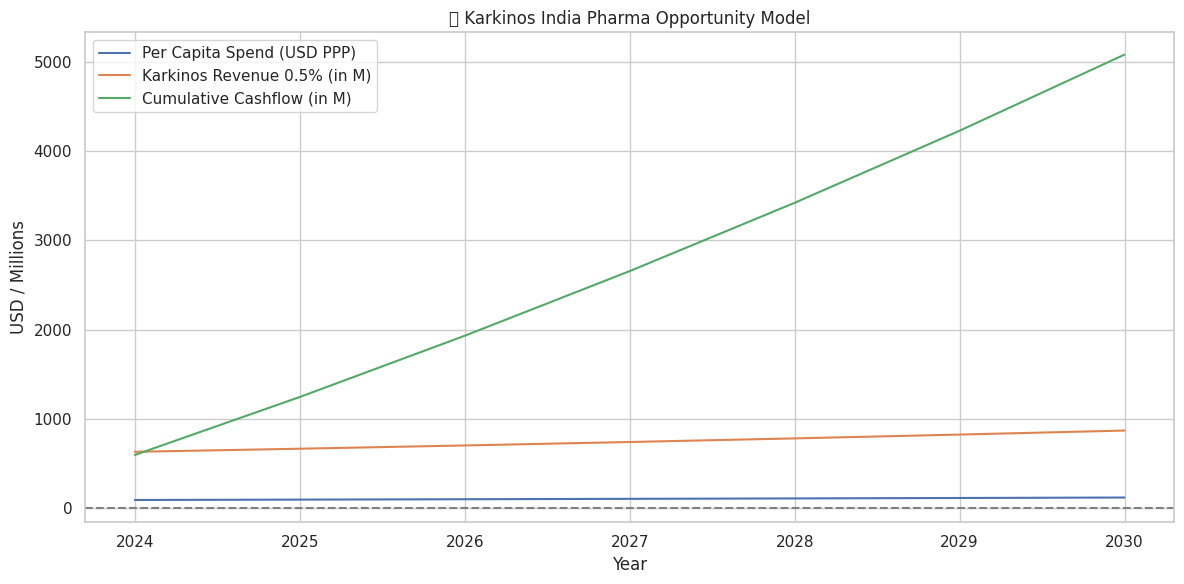

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.plot(df_proj["Year"], df_proj["India_Per_Capita_Spend"], label="Per Capita Spend (USD PPP)")
plt.plot(df_proj["Year"], df_proj["Revenue_0.5%"] / 1e6, label="Karkinos Revenue 0.5% (in M)")
plt.plot(df_proj["Year"], df_proj["Cumulative_Cashflow"] / 1e6, label="Cumulative Cashflow (in M)")
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.title("💹 Karkinos India Pharma Opportunity Model")
plt.xlabel("Year")
plt.ylabel("USD / Millions")
plt.tight_layout()
plt.show()